# TAREA 1

1.−  Realice un notebook en el se programen y expliquen los siguientes algoritmos de integración de ecuaciones diferenciales:

(a)Integración con método de Euler

(b)Integración sobre serie de Taylor a 2o orden

(c)Integración con método de Runge-Kutta de 2o orden

(d)Integración con método de Runge-Kutta de 4o orden

Verifique el funcionamiento de sus integradores encontrando la solución de la siguiente ecuación diferencial para $y(t)$:
$$\ddot x+0.5\dot x+sin(x)=e^{−t}sin(3t)$$
Con condiciones iniciales $\dot x(0)=1$ y $x(0)=0$

In [17]:
#usaremos algunas librerias
from pylab import *
from numpy import *
%matplotlib inline

En general para que nuestros integradores funcionen es necesario disminuir el orden de la EDO por tal mótivo tenemos que 
$$\dot x = y$$ 
$$\dot y = e^{-t}sin(3t)+0.5y+sin(x)$$
por lo que tenemos etnonces que
$$ x(0) = 0$$
$$y(0)=1$$
Definimos la función 

### Metodo de Euler

In [43]:
#t_final limite de pasos, p_ini condición incial 
def euler(funcion,p_ini,x,h=0.01,ommega=0):
    tiempos = arange(x[0],x[1] + h, h)
    y = zeros((len(tiempos),len(p_ini)))
    y[0,:] = p_ini
    if ommega == 0:
        for i in range(len(tiempos)-1):
            y[i+1] = y[i] + funcion(y[i],tiempos[i])*h
    else:
        for i in range(len(tiempos)-1):
            y[i+1] = y[i] + funcion(y[i],tiempos[i],ommega)*h
        #solucion = [tiempos,y]
    return tiempos,y


### Metodo de Taylor

In [55]:
def taylor(funcion, dfuncion, p_ini, x, h=0.1):
    tiempos = arange(x[0], x[1]+h, h)
    y = zeros((len(tiempos), len(p_ini)))
    y[0,:] = p_ini
    for i in xrange(len(tiempos)-1):
        f = funcion(y[i,:], tiempos[i])
        df, jacobiano = dfuncion(y[i,:], tiempos[i])
        y[i+1,:] = y[i,:]+h*f+(0.5*h*h*(df+dot(jacobiano, f)))
    return tiempos, y

### Metodo de Runge-Kutta 2do orden

In [56]:
def rk2(ecuacion, punto_inicial, x, h=0.1):
    tiempos = arange(x[0], x[1]+h, h)
    solucion = zeros((len(tiempos), len(punto_inicial)))
    solucion[0,:] = punto_inicial
    for i in xrange(len(tiempos)-1):
        k = h*ecuacion(solucion[i,:], tiempos[i])
        f = ecuacion(solucion[i,:]+0.5*k, tiempos[i]+0.5*h)
        solucion[i+1,:] = solucion[i,:]+h*f
    return tiempos, solucion



### Integracion con metodo de Runge-Kutta de 4 orden

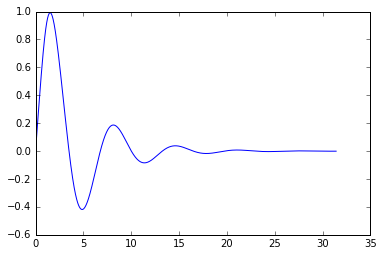

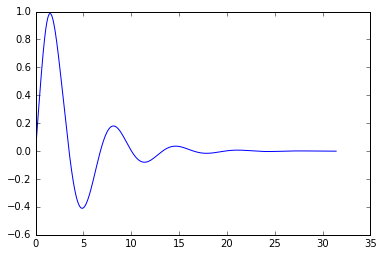

In [62]:
def funcion1(x, t):
    y1 = x[1]
    y2 = -0.5*x[1] - sin(x[0]) + exp(-t)*sin(3*t)
    return array ([y1, y2])
def dfuncion1(x,t):
    return array ([0, (3*cos(3*t)-sin(3*t))*exp(-t)]), array([[0,1],[-cos(x[0]),-0.5]])

tiempos_euler, solucion_euler = euler(funcion1, array([0.0, 1.0]), [0, 10*pi],0.01,0)
tiempos_taylor, solucion_taylor = taylor(funcion1, dfuncion1, array([0.0, 1.0]), [0, 10*pi], 0.01)
plot(tiempos_euler, solucion_euler[:,0], label="Euler")
show()
plot(tiempos_taylor, solucion_taylor[:,0], label="taylor")

## Ejercicio 3 

Modifique las funciones integradoras en el problema 1 de tal manera que se puedan pasar argumentos opcionales al sistema de ecuaciones diferenciales de tal manera que se puedan modificar parametros al momento de hacer la integracion. Una vez hecho esto, obtenga la solucion de la siguiente ecucacion diferencial:
$$\ddot x + \frac{1}{10} \dot x+ 4sin(x) = \frac{1}{2} sin(\omega t)$$
Con condiciones iniciales $\dot{x}(0) = 1$ y $x(0) = 0$ y para $\omega = \{1,1.1,1.2,1.3,...,2.9,3\}$. Realice la grafica de algunas soluciones que representen el comportamiento de la solucion en funcion de $\omega$ y explique su resultado.

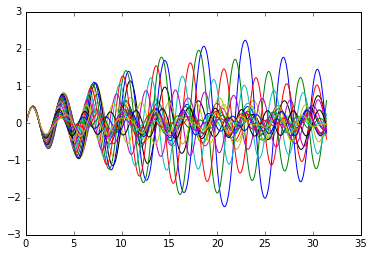

In [36]:
def funcion3(x,t,ommega=1):
    y1 = x[1]
    y2 = -0.5*sin(ommega*t) - 4*sin(x[0]) -(0.1*x[1])
    return array ([y1,y2])
k = 1
while k <= 3:
    tiempos_euler, solucion_euler = euler(funcion3, array([0.0, 1.0]), [0, 10*pi],0.01,k)
    plot(tiempos_euler, solucion_euler[:,0], label="Euler")
    k = k + .1
